In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Import necessary libraries for each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


In [4]:
# Load your data
df = pd.read_csv("../data/dataset2cleaned.csv")

# Split features and target label
X = df.drop(columns=['genre'])  # Features
y = df['genre']  # Target (genre label)



# Random Forest ------------
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=20,
    n_estimators=100,
    max_features='log2',
    min_samples_split=2,)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("RF Accuracy:", accuracy_score(y_test, y_pred))
print("\nRF Classification Report:\n", classification_report(y_test, y_pred))

RF Accuracy: 0.827

RF Classification Report:
               precision    recall  f1-score   support

   classical       0.93      0.92      0.92       216
     country       0.80      0.73      0.76       190
        jazz       0.80      0.83      0.82       192
         pop       0.81      0.90      0.86       210
        rock       0.78      0.74      0.76       192

    accuracy                           0.83      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.83      0.83      1000



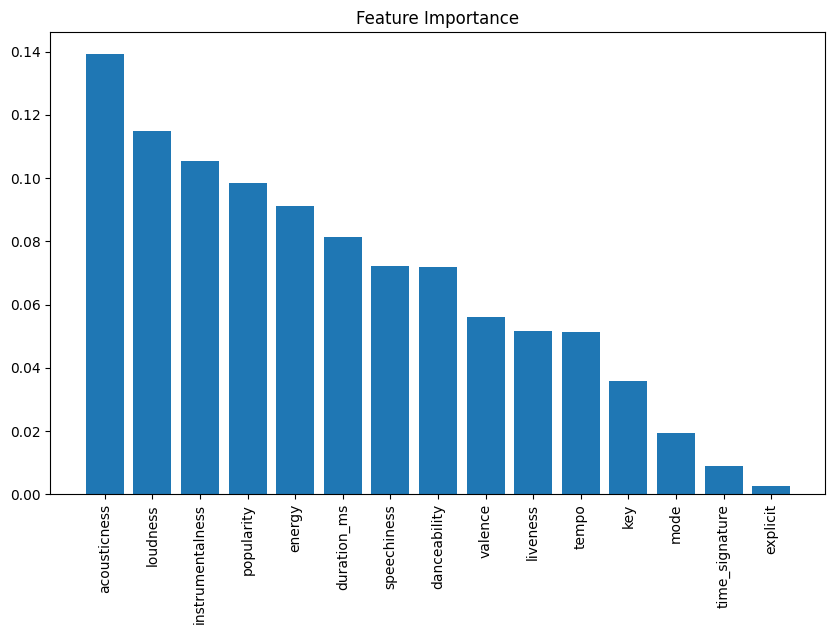

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importance")
plt.show()


In [ ]:
# Load your data
df = pd.read_csv("../data/dataset2cleaned.csv")

# Split features and target label
X = df.drop(columns=['genre', 'explicit'])  # Features
y = df['genre']  # Target (genre label)



# Random Forest ------------
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=20,
    n_estimators=110,
    max_features='log2',
    min_samples_split=2,)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("RF Accuracy:", accuracy_score(y_test, y_pred))
print("\nRF Classification Report:\n", classification_report(y_test, y_pred))

RF Accuracy: 0.817

RF Classification Report:
               precision    recall  f1-score   support

   classical       0.93      0.93      0.93       216
     country       0.80      0.72      0.76       190
        jazz       0.80      0.83      0.81       192
         pop       0.81      0.87      0.84       210
        rock       0.74      0.72      0.73       192

    accuracy                           0.82      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.82      0.82      0.82      1000



In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Hyperparameters:", grid_search.best_params_)
rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sq

KeyboardInterrupt: 

In [73]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

stacked_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42, max_depth=20, n_estimators=100, max_features='log2', min_samples_split=2)),
        ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
        
    ],
    final_estimator=LogisticRegression()
)
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Evaluate model
print("RF Accuracy:", accuracy_score(y_test, y_pred))
print("\nStacked Classification Report:\n", classification_report(y_test, y_pred))

RF Accuracy: 0.836

Stacked Classification Report:
               precision    recall  f1-score   support

   classical       0.95      0.94      0.94       216
     country       0.80      0.76      0.78       190
        jazz       0.82      0.87      0.85       192
         pop       0.85      0.86      0.85       210
        rock       0.75      0.74      0.74       192

    accuracy                           0.84      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.84      0.84      0.84      1000



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.8045
